## Задание 05 

In [ ]:
!pip install ndlib

In [2]:
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
import networkx as nx
import pandas as pd

import ndlib.models.epidemics.SIModel as si
import ndlib.models.epidemics.SISModel as sis
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from tqdm import tqdm

### 1. Влияние топологии на характерное время распространение эпидемии в SI модели.

* Сгенерируйте случайные графы из разных моделей: Эрдеша-Реньи, Барабаши-Альберта, Ваттса-Строгатца. 

Число вершин всех графов $N=10^4$, а средняя степень у всех примерно одинакова и, например, $\left< k\right>\approx10$. 

* Смоделируйте SI модель, изобразите на одном графике среднюю долю инфицированных от времени для разных графов.  

Параметры модели SI - $\beta$ и число шагов по времени - подберите самостоятельно. Усреднение можно проводить по 100 запускам SI (Не по графам!!!).

На этом же графике изобразите кривую, отвечающую приближению среднего поля. 

* Видите ли вы отличия в распространении эпидемии? Объясните результаты. 

In [ ]:
def si_func(x0,beta_k,t):
    return x0*np.exp(beta_k*t)/(1-x0+x0*np.exp(beta_k*t))

In [23]:
N=10000
beta=0.03
k = 10
n_iter=160
p = k/N
beta_k=k*beta
t=np.linspace(0,n_iter-1,n_iter)
n_run=100

In [ ]:
stats_erdos_renyi = {'susceptible_erdos_renyi' : [], 
                     'infected_erdos_renyi': []}
    
for i in tqdm(range(n_run)):
    G=nx.erdos_renyi_graph(N,p)
    si_model = ep.SIModel(G) #
    config = mc.Configuration()
    config.add_model_parameter('beta', beta)
    config.add_model_parameter("percentage_infected", 0.02)
    si_model.set_initial_status(config)
    iterations = si_model.iteration_bunch(n_iter)
    susceptible_erdos_renyi, infected_erdos_renyi= [],[]
    for iteration in iterations:
        node_count = iteration['node_count']
        susceptible_erdos_renyi.append(node_count[0]/N)
        infected_erdos_renyi.append(node_count[1]/N)

    stats_erdos_renyi['susceptible_erdos_renyi'].append(susceptible_erdos_renyi)
    stats_erdos_renyi['infected_erdos_renyi'].append(infected_erdos_renyi)
    
s1=[np.mean(np.array(stats_erdos_renyi['infected_erdos_renyi']), axis=0)]

In [ ]:
stats_barabasi_albert = {'susceptible_barabasi_albert' : [],
                         'infected_barabasi_albert': []}

for i in tqdm(range(n_run)):
  G=nx.barabasi_albert_graph(N,5)
  si_model = ep.SIModel(G) #
  config = mc.Configuration()
  config.add_model_parameter('beta', beta)
  config.add_model_parameter("percentage_infected", 0.02)
  si_model.set_initial_status(config)
  iterations = si_model.iteration_bunch(n_iter)
  susceptible_barabasi_albert, infected_barabasi_albert= [],[]
  for iteration in iterations:
      node_count = iteration['node_count']
      susceptible_barabasi_albert.append(node_count[0]/N)
      infected_barabasi_albert.append(node_count[1]/N)

  stats_barabasi_albert['susceptible_barabasi_albert'].append(susceptible_barabasi_albert)
  stats_barabasi_albert['infected_barabasi_albert'].append(infected_barabasi_albert)

s2=[np.mean(np.array(stats_barabasi_albert['infected_barabasi_albert']), axis=0)]

In [ ]:
stats_watts_strogatz = {'susceptible_watts_strogatz' : [],
                        'infected_watts_strogatz': []}

for i in tqdm(range(n_run)):
  G=nx.watts_strogatz_graph(N,k,p)
  si_model = ep.SIModel(G) #
  config = mc.Configuration()
  config.add_model_parameter('beta', beta)
  config.add_model_parameter("percentage_infected", 0.02)
  si_model.set_initial_status(config)
  iterations = si_model.iteration_bunch(n_iter)
  susceptible, infected= [],[]
  for iteration in iterations:
      node_count = iteration['node_count']
      susceptible.append(node_count[0]/N)
      infected.append(node_count[1]/N)

  stats_watts_strogatz['susceptible_watts_strogatz'].append(susceptible)
  stats_watts_strogatz['infected_watts_strogatz'].append(infected)
    
s3=[np.mean(np.array(stats_watts_strogatz['infected_watts_strogatz']), axis=0)]

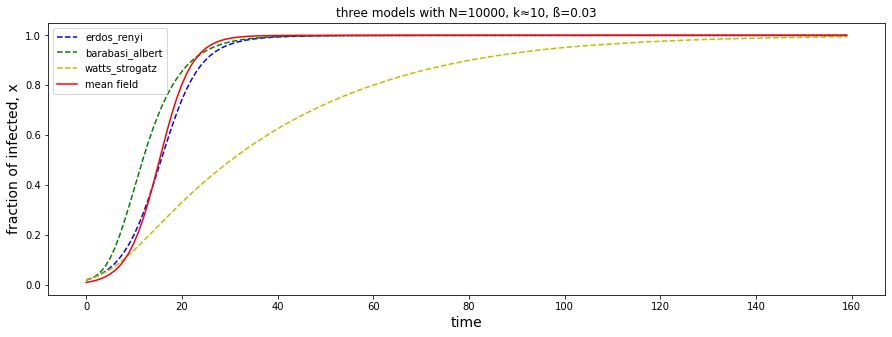

In [ ]:
fig = plt.figure(figsize=(15,5))
t=np.linspace(0,n_iter-1,n_iter)
beta_k = beta*k
plt.plot(t,s1[0],'--',color='b', label='erdos_renyi')
plt.plot(t,s2[0],'--',color='g', label='barabasi_albert')
plt.plot(t,s3[0],'--',color='y', label='watts_strogatz')
plt.plot(t,si_func(0.01,beta_k,t),color='r',label='mean field')
plt.xlabel('time',fontsize=14)
plt.ylabel('fraction of infected, x',fontsize=14)
plt.xlabel('time',fontsize=14)
plt.ylabel('fraction of infected, x',fontsize=14)
plt.title('three models with N='+str(N)+', k≈'+str(k)+', ß='+str(beta))
plt.legend()
plt.show()

In [ ]:
G_erdos=nx.erdos_renyi_graph(N,p)
print(nx.average_clustering(G_erdos))

0.0009127475104874499


In [ ]:
G_barabasi=nx.barabasi_albert_graph(N,5)
print(nx.average_clustering(G_barabasi))

0.006674893803913241


In [ ]:
G_strogatz=nx.watts_strogatz_graph(N,k,p)
print(nx.average_clustering(G_strogatz))

0.6645833333334076


по результатам вычислений глобальных коэффициентов кластеризации:

коэф модели Ваттса-Строгатца в разы больше, чем у остальных моделей;
следовательно, в этой модели есть большая вероятность образования кластеров - из-за этого распространение вируса происходит намного медленнее(вирус может долго распространяться внутри кластера). 

### 2. Порог зажигания в модели SIS.
Рассмотрим модель SIS с параметром $\mu=1$ на двух графах из задания 1: Эрдеша-Реньи и Барабаши-Альберта. 
Так как $\left< k\right>\approx10$ и $\mu=1$, то пороговое значение $\beta$, выше которого  эпидемия не затухает из приближения среднего поля:
$$
\beta=\frac{1}{\left< k\right>}\approx 0.1,
$$

Постройте зависимость средней доли зараженных в сетях от параметра $\beta$, $\beta \in\left[0,0.2 \right]$. Усреднение проводите по 100 запускам SIS. Число шагов по времени (итераций) определите самостоятельно. 

In [29]:
betas = np.linspace(0, 0.2, 10)
λ = 1
n_iter = 10
n_run=100

In [35]:
models = {'Erdos_Renyi':nx.erdos_renyi_graph(N,k/(N-1)),
          'Barabasi_Albert':nx.barabasi_albert_graph(N,5)}
infected_in_model = {model_name:{beta:[] for beta in betas} for model_name in models} 

In [37]:
%%capture
for model_name,G in models.items():
  for beta in betas:         
    for i in range(n_run):
        config = mc.Configuration()
        config.add_model_parameter('beta', beta)
        config.add_model_parameter('lambda', λ)
        config.add_model_parameter("percentage_infected", 0.03)  
        sis_model = ep.SISModel(G)
        sis_model.set_initial_status(config)
        iterations = sis_model.iteration_bunch(n_iter)
        infected = np.zeros(n_iter)
        for i,iteration in enumerate(iterations):
          node_count = iteration['node_count']
          infected[i] = node_count[1]/N
        infected_in_model[model_name][beta].append(infected) 

In [38]:
mean_infected = {model_name:{beta:np.mean(np.array(infected_in_model[model_name][beta]), axis=0) for beta in betas} for model_name in models}

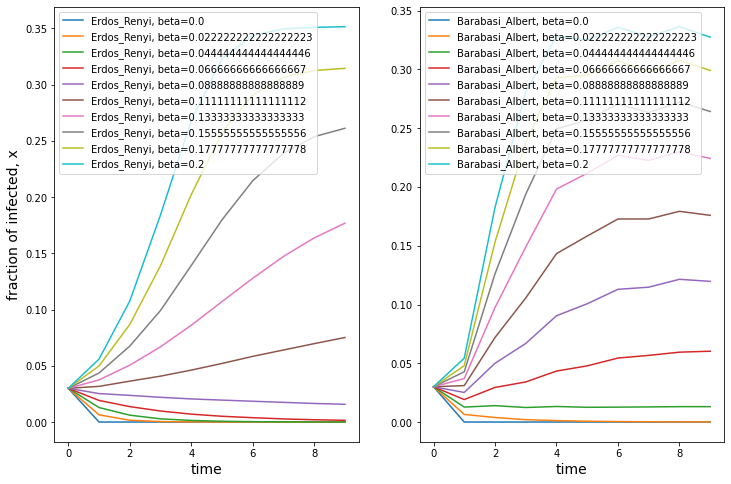

In [49]:
t=np.linspace(0,n_iter-1,n_iter)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

plt.subplot(121)
model_name = 'Erdos_Renyi' 
for beta in betas:
    plt.plot(t,mean_infected[model_name][beta], label=model_name+f", beta={beta}")  
plt.xlabel('time',fontsize=14)
plt.ylabel('fraction of infected, x',fontsize=14)
plt.legend();

plt.subplot(122)
model_name = 'Barabasi_Albert' 
for beta in betas:
    plt.plot(t,mean_infected[model_name][beta], label=model_name+f", beta={beta}")
plt.xlabel('time',fontsize=14)
plt.legend();

### 3. Влияние топологии в модели SIR.
Рассмотрим модель SIR на следующих сетях: 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving graph1.graphml to graph1.graphml
Saving graph2.graphml to graph2.graphml
User uploaded file "graph1.graphml" with length 769152 bytes
User uploaded file "graph2.graphml" with length 769152 bytes


In [ ]:
G1=nx.read_graphml('graph1.graphml')
G2=nx.read_graphml('graph2.graphml')

* Постройте зависимости средней доли зараженных вершин в модели SIR для первого и второго графа.

Параметры для моделирования:

In [ ]:
beta=0.005
gamma=0.03
percentage_infected=0.002
n_iter=200 # число шагов моделирования
n_run=100 # число запусков распространения для усреднения

* Отличаются ли построенные зависимости? 
Попробуйте понять, что влияет на распространение в сети, для этого исследуйте топологию G1, G2. 

In [ ]:
stats_g1 = {'susceptible_g1' : [],
            'infected_g1': [],
            'recovered_g1': []}
for i in tqdm(range(n_run)):
  sir_model = ep.SIRModel(G1)
  config = mc.Configuration()
  config.add_model_parameter('beta', beta)
  config.add_model_parameter('gamma', gamma)
  config.add_model_parameter("percentage_infected", percentage_infected)
  sir_model.set_initial_status(config)
  iterations = sir_model.iteration_bunch(n_iter)
  susceptible_g1,infected_g1,recovered_g1 = [],[],[]
  
  for iteration in iterations:
      node_count = iteration['node_count']
      susceptible_g1.append(node_count[0]/N)
      infected_g1.append(node_count[1]/N)
      recovered_g1.append(node_count[2]/N)

  stats_g1['susceptible_g1'].append(susceptible_g1)
  stats_g1['infected_g1'].append(infected_g1)
  stats_g1['recovered_g1'].append(recovered_g1)
    
s1_g1=[np.mean(np.array(stats_g1['susceptible_g1']), axis=0),
        np.mean(np.array(stats_g1['infected_g1']), axis=0),
        np.mean(np.array(stats_g1['recovered_g1']), axis=0)]

In [ ]:
stats_g2 = {'susceptible_g2' : [],
            'infected_g2': [],
            'recovered_g2': []}

for i in tqdm(range(n_run)):
  sir_model = ep.SIRModel(G2)
  config = mc.Configuration()
  config.add_model_parameter('beta', beta)
  config.add_model_parameter('gamma', gamma)
  config.add_model_parameter("percentage_infected", percentage_infected)
  sir_model.set_initial_status(config)
  iterations = sir_model.iteration_bunch(n_iter)
  susceptible_g2,infected_g2,recovered_g2 = [],[],[]
  
  for iteration in iterations:
      node_count = iteration['node_count']
      susceptible_g2.append(node_count[0]/N)
      infected_g2.append(node_count[1]/N)
      recovered_g2.append(node_count[2]/N)

  stats_g2['susceptible_g2'].append(susceptible_g2)
  stats_g2['infected_g2'].append(infected_g2)
  stats_g2['recovered_g2'].append(recovered_g2)
    
s2_g2=[np.mean(np.array(stats_g2['susceptible_g2']), axis=0),
        np.mean(np.array(stats_g2['infected_g2']), axis=0),
        np.mean(np.array(stats_g2['recovered_g2']), axis=0)]

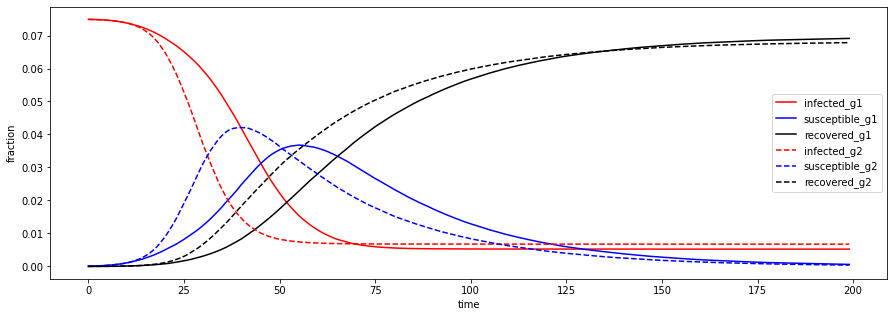

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.plot(s1_g1[0],color='r',label='infected_g1')
plt.plot(s1_g1[1], color='b',label='susceptible_g1')
plt.plot(s1_g1[2], color='k',label='recovered_g1')
plt.plot(s2_g2[0],'--', color='r',label='infected_g2')
plt.plot(s2_g2[1],'--', color='b',label='susceptible_g2')
plt.plot(s2_g2[2],'--', color='k',label='recovered_g2')
plt.xlabel('time')
plt.ylabel('fraction')
plt.legend()
plt.show()

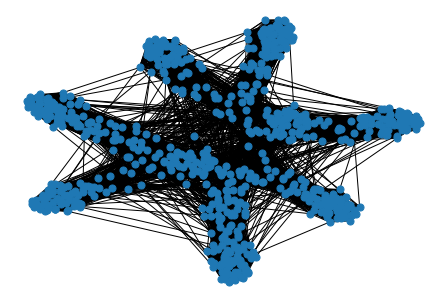

In [ ]:
nx.draw(G1,node_size=50)

In [ ]:
print(nx.average_clustering(G1))

0.7119907907406062


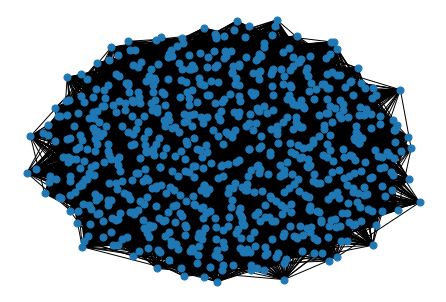

In [ ]:
nx.draw(G2,node_size=50)

In [ ]:
print(nx.average_clustering(G2))

0.07991608132532708


Глобальные коэффициенты кластеризации показывают, что вторая сеть относительно однородная, а в первой сети наблюдается стремление узлов к кластеризации. В силу низкой кластеризаии во втором графе распространение вируса происходит быстрее, чем в первом. 